In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt

## Параметрические тесты
### Тест Стьюдента

Проверка среднего значения двух выборок или одной выборки с целевым значением

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Распределение данных - нормальное или близкое к нормальному. Можно применять для других распределений
* Одинаковая вариация в выборках.

Гипотеза

* H0: Средние выборок одинаковы / Средние выборки совпадает с целевым значением 
* H1: Средние выборок различаются / Средние выборки отличается от целевого значения

#### Одновыборочный тест

<b>Задача.</b> Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения?

In [28]:
np.random.seed(54)

population_ages1=st.norm.rvs(loc=20, scale=45, size=15000)   
population_ages2=st.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1, population_ages2))  # Сгенерировали всю популяцию. 

india_ages1=st.norm.rvs(loc=19, scale=65, size=2000)  # Индия 1
india_ages2=st.norm.rvs(loc=19, scale=55, size=2000)
india_ages=np.concatenate((india_ages1, india_ages2)) #Выборка
print('Средний возраст всего мира', population_ages.mean())
print('Средний возраст индусов', india_ages.mean())

Средний возраст всего мира 19.870598784440563
Средний возраст индусов 20.815033188073294


In [29]:
stat, p = st.ttest_1samp(a=india_ages, popmean=population_ages.mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, не отличается от среднего по миру")
else:
    print("Отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, отличается от среднего по миру")

Статистика = 0.995, p = 0.320
Не отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, не отличается от среднего по миру


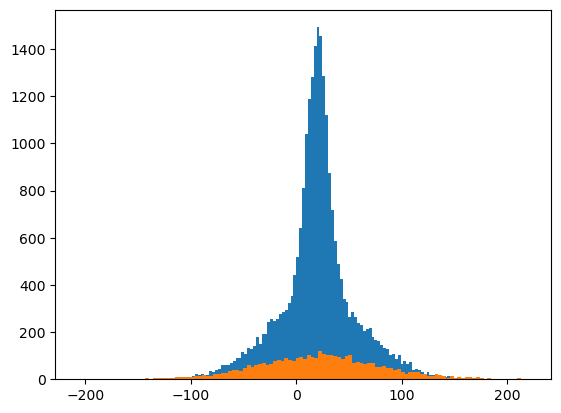

In [5]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

#### Тест для двух выборок

<b>Задача.</b> Такой тест показывает, имеют ли две выборки разные средние значения.

In [6]:
np.random.seed(54)

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
data1 = st.norm.rvs(loc=50, scale=10, size=100)  
data2 = st.norm.rvs(loc=45, scale=15, size=100) 

stat, p = st.ttest_ind(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 1.52053, p = 0.12997
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


По умолчанию критерий Стьюдента подразумевает равенство дисперсий двух выборок. Если дисперсии отличаются (можно проверить с помощью F-теста), то нужно использовать поправку Уэлча (Welch). В scipy это реализовано через параметр функции ttest_ind: `equal_var = False`

In [7]:
stat, p = st.ttest_ind(data1, data2, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 1.52053, p = 0.13031
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


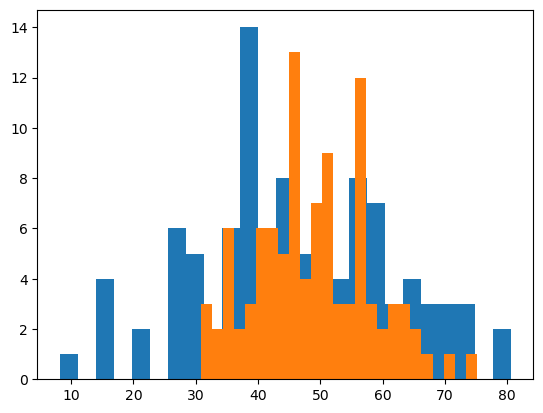

In [8]:
plt.hist(data2, bins=25); #Выборка A
plt.hist(data1, bins=25);  #Выборка B

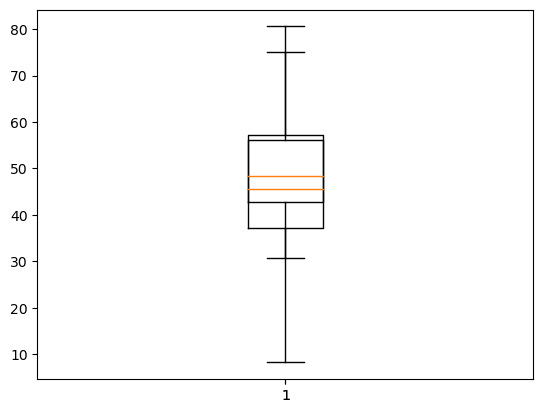

In [9]:
plt.boxplot(data1);
plt.boxplot(data2);

<b>Помимо проверки, что выборки могу значимо различаться, t-Тест еще полезен при поиске выбросов в данных.</b>

### Парный тест Стьюдента
Сравнивает средние значения при связанных данных, когда измерения проводились, например, до и после каких-то изменений. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Распределение данных - нормлаьное или близкое к нормальному. Можно применять для других распределений, но осторожно.
* Одинаковая вариация в выборках.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Средние выборок одинаковы.
* H1: Средние выборок различаются.

<b>Задача.</b> В парном выборочном t-тесте каждый объект измеряется дважды, в результате чего получаются пары наблюдений. Предположим, нас интересует оценка эффективности программы обучения компании.

In [10]:
np.random.seed(54)

before = st.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + st.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"вес_до":before,
                         "вес_после":after,
                         "вес_изменение":after-before})
weight_df.describe()

,вес_до,вес_после,вес_изменение
count,100.000000,100.000000,100.000000
mean,246.691328,246.800651,0.109323
std,28.161039,28.746787,5.153353
min,192.332479,189.122861,-12.533319
25%,228.405828,225.747076,-2.846210
50%,245.169221,244.712994,-0.115017
75%,268.328626,266.582395,3.782396
max,325.254027,319.269443,11.587162


In [11]:
stat, p = st.ttest_rel(a=before, b=after)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -0.212, p = 0.832
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


<b>Задача.</b> Рассмотрим рынок жилья в Нью-Йорке.

New York City Airbnb Open Data Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>

In [12]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.dropna(how='any',inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


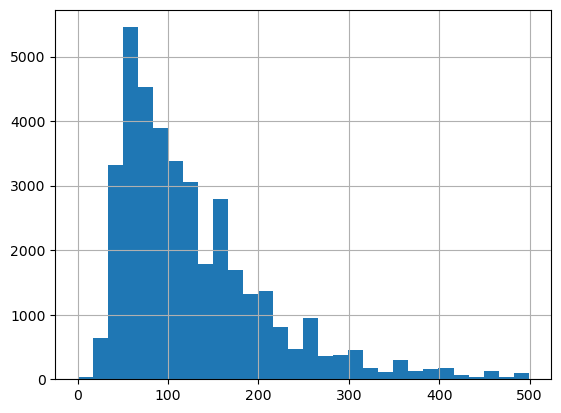

In [13]:
df[df.price<500].price.hist(bins=30);

<b>Преобразуем данные</b>

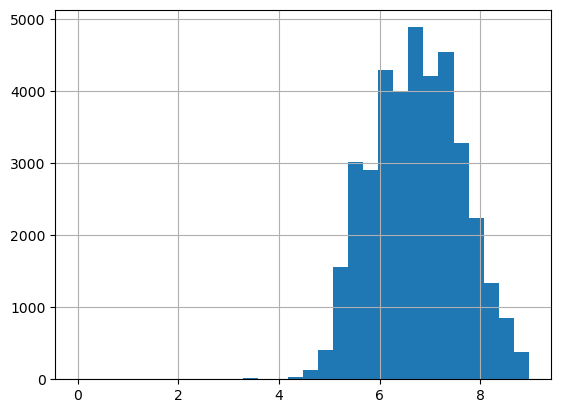

In [14]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=30);

<b>Теперь можно применять параметрические тесты!</b>

## Непараметрические тесты
### Тест Манна-Уитни 
Критерий Манна-Уитни представляет непараметрическую альтернативу критерия Стьюдента для независимых выборок и используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.

Гипотеза

* H0: Распределения одинаковы.
* H1: Распределения различаются.

In [15]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = st.mannwhitneyu(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 40.00000, p = 0.47268
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


### Тест Вилкоксона
Тест Вилкоксона - это непараметрический аналог парного критерия Стьюдента. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Две связанные выборки принадлежат одному распределению.
* H1: Две связанные выборки принадлежат разным распределениям.

In [16]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = st.wilcoxon(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 21.00000, p = 0.55664
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [17]:
dif = np.array(data1) - np.array(data2)

stat, p = st.wilcoxon(dif)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 21.00000, p = 0.55664
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


### Точный критерий Фишера
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами. 

Допущения

* Наблюдения независимы друг от друга.
* Встречаются ограничения на минимальное число наблюдений. 

Гипотеза

* H0: Выборки независимы.
* H1: Есть некторая зависимость.

<b>Задача.</b> Мы хотим проверить нет ли дискриминации по половому признаку в сфере Data Science. Мы узнали, что в какой-то компании после серии собеседований 107 мужчин взяли на работу, а отказали 93-м мужчинам. А среди женщин 74 взяли, а отказали 45-и. Относится ли руководство компании предвзято к мужчинам или к женщинам?

In [18]:
x = [[107,93],[74,45]]

oddsratio, p = st.fisher_exact(x) # Точный тест Фишера

print(f"Статистика = {oddsratio:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы')
else:
    print('Отклоняем нулевую гипотезу, вероятно, есть некоторая зависимость')

Статистика = 0.69965, p = 0.16076
Не отклоняем нулевую гипотезу, выборки, вероятно, независимы


### Тест Хи-квадрат
Например, мы хотим проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинаюший?

In [19]:
contingency_table = pd.DataFrame(
    [  
[22, 99, 59],        
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)

Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


In [27]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Это правда эксперт!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.000173, уровень значимости = 0.05
На уровене значимости 0.05, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.
Это правда эксперт!
